In [12]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
import pathlib
import glob
import itertools
import pandas as pd
import seaborn as sns


from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping
from tensorflow.keras.layers import Conv2D, Flatten, Dense, MaxPooling2D, BatchNormalization, GlobalAveragePooling2D, Dropout
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.applications.efficientnet_v2 import EfficientNetV2M
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.applications.inception_resnet_v2 import InceptionResNetV2
from tensorflow.keras.applications.xception import Xception
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers import RMSprop
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report
from mlxtend.plotting import plot_confusion_matrix

In [13]:
train_data_dir = r"D:/experiments/Datasets/ip102_v1.1-002/ip102_v1.1/prepared_data/train_all/"
valid_data_dir = r"D:/experiments/Datasets/ip102_v1.1-002/ip102_v1.1/prepared_data/val_all/"
test_data_dir = r"D:/experiments/Datasets/ip102_v1.1-002/ip102_v1.1/prepared_data/test_all/"

In [14]:
classes = ['rice leaf roller',
        'rice leaf caterpillar',
        'paddy stem maggot',
        'asiatic rice borer',
        'yellow rice borer',
        'rice gall midge',
        'Rice Stemfly',
        'brown plant hopper',
        'white backed plant hopper',
        'small brown plant hopper',
        'rice water weevil',
        'rice leafhopper',
        'grain spreader thrips',
        'rice shell pest',
        'grub',
        'mole cricket',
        'wireworm',
        'white margined moth',
        'black cutworm',
        'large cutworm',
        'yellow cutworm',
        'red spider',
        'corn borer',
        'army worm',
        'aphids',
        'Potosiabre vitarsis',
        'peach borer',
        'english grain aphid',
        'green bug',
        'bird cherry-oataphid',
        'wheat blossom midge',
        'penthaleus major',
        'longlegged spider mite',
        'wheat phloeothrips',
        'wheat sawfly',
        'cerodonta denticornis',
        'beet fly',
        'flea beetle',
        'cabbage army worm',
        'beet army worm',
        'Beet spot flies',
        'meadow moth',
        'beet weevil',
        'sericaorient alismots chulsky',
        'alfalfa weevil',
        'flax budworm',
        'alfalfa plant bug',
        'tarnished plant bug',
        'Locustoidea',
        'lytta polita',
        'legume blister beetle',
        'blister beetle',
        'therioaphis maculata Buckton',
        'odontothrips loti',
        'Thrips',
        'alfalfa seed chalcid',
        'Pieris canidia',
        'Apolygus lucorum',
        'Limacodidae',
        'Viteus vitifoliae',
        'Colomerus vitis',
        'Brevipoalpus lewisi McGregor',
        'oides decempunctata',
        'Polyphagotars onemus latus',
        'Pseudococcus comstocki Kuwana',
        'parathrene regalis',
        'Ampelophaga',
        'Lycorma delicatula',
        'Xylotrechus',
        'Cicadella viridis',
        'Miridae',
        'Trialeurodes vaporariorum',
        'Erythroneura apicalis',
        'Papilio xuthus',
        'Panonchus citri McGregor',
        'Phyllocoptes oleiverus ashmead',
        'Icerya purchasi Maskell',
        'Unaspis yanonensis',
        'Ceroplastes rubens',
        'Chrysomphalus aonidum',
        'Parlatoria zizyphus Lucus',
        'Nipaecoccus vastalor',
        'Aleurocanthus spiniferus',
        'Tetradacus c Bactrocera minax',
        'Dacus dorsalis(Hendel)',
        'Bactrocera tsuneonis',
        'Prodenia litura',
        'Adristyrannus',
        'Phyllocnistis citrella Stainton',
        'Toxoptera citricidus',
        'Toxoptera aurantii',
        'Aphis citricola Vander Goot',
        'Scirtothrips dorsalis Hood',
        'Dasineura sp',
        'Lawana imitata Melichar',
        'Salurnis marginella Guerr',
        'Deporaus marginatus Pascoe',
        'Chlumetia transversa',
        'Mango flat beak leafhopper',
        'Rhytidodera bowrinii white',
        'Sternochetus frigidus',
        'Cicadellidae'
]

# Efficientnet

In [15]:
datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    vertical_flip=True,
    horizontal_flip=True,
    fill_mode='nearest'
)

In [ ]:
#  without augmentation
# datagen = ImageDataGenerator()

In [16]:
train_batchs_Res = datagen.flow_from_directory(directory=train_data_dir, target_size=(224,224), classes=classes, batch_size=64)

valid_batchs_Res = datagen.flow_from_directory(directory=valid_data_dir, target_size=(224,224), classes=classes, batch_size=64)

test_batchs_Res = datagen.flow_from_directory(directory=test_data_dir, target_size=(224,224), classes=classes, batch_size=64, shuffle=False)

Found 38400 images belonging to 102 classes.
Found 6352 images belonging to 102 classes.
Found 20047 images belonging to 102 classes.


In [17]:
base_model_Res = EfficientNetV2M(include_top = False, weights = 'imagenet',input_shape=(224, 224, 3))

for layer in base_model_Res.layers:
    layer.trainable = True

In [18]:
x = base_model_Res.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)

predictions = Dense(train_batchs_Res.num_classes, activation='softmax')(x)

modelRes = Model(inputs=base_model_Res.input, outputs=predictions)



In [19]:
modelRes.compile(optimizer = Adam(learning_rate=0.0001), loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [20]:
callbacks = [
        ModelCheckpoint("SavedModels/EfficientNetV2M/EfficientNetV2M_filtered_Adam_aug.h5", verbose=1, save_best_model=True),
        ReduceLROnPlateau(monitor="val_loss", patience=3, factor=0.1, verbose=1, min_lr=1e-6),
        EarlyStopping(monitor="val_loss", patience=5, verbose=1)
    ]

In [10]:
history_Res = modelRes.fit(x = train_batchs_Res, 
            steps_per_epoch=train_batchs_Res.samples // 64,
            validation_data = valid_batchs_Res,
            validation_steps=valid_batchs_Res.samples // 64,
            epochs = 500, verbose = 1,
            callbacks=callbacks,)

Epoch 1/500
600/600 [==============================] - ETA: 0s - loss: 2.3643 - accuracy: 0.4441
Epoch 1: saving model to SavedModels/EfficientNetV2M\EfficientNetV2M_filtered_Adam_aug.h5
600/600 [==============================] - 368s 592ms/step - loss: 2.3643 - accuracy: 0.4441 - val_loss: 1.6902 - val_accuracy: 0.5608 - lr: 1.0000e-04
Epoch 2/500
600/600 [==============================] - ETA: 0s - loss: 1.2239 - accuracy: 0.6586
Epoch 2: saving model to SavedModels/EfficientNetV2M\EfficientNetV2M_filtered_Adam_aug.h5
600/600 [==============================] - 225s 375ms/step - loss: 1.2239 - accuracy: 0.6586 - val_loss: 1.6007 - val_accuracy: 0.5889 - lr: 1.0000e-04
Epoch 3/500
600/600 [==============================] - ETA: 0s - loss: 0.9244 - accuracy: 0.7320
Epoch 3: saving model to SavedModels/EfficientNetV2M\EfficientNetV2M_filtered_Adam_aug.h5
600/600 [==============================] - 229s 380ms/step - loss: 0.9244 - accuracy: 0.7320 - val_loss: 1.2617 - val_accuracy: 0.6618 

In [21]:
Res_model = tf.keras.models.load_model('SavedModels/EfficientNetV2M/EfficientNetV2M_filtered_Adam_aug.h5')

Res_predictions = Res_model.predict(x=test_batchs_Res, verbose=0)

In [ ]:
import time

# Load the model
Res_model = tf.keras.models.load_model('SavedModels/EfficientNetV2M/EfficientNetV2M_filtered_Adam_aug.h5')

# Get the number of images in the test batch
num_images = len(test_batchs_Res)

# Start the timer before prediction
start_time = time.time()

# Make predictions
Res_predictions = Res_model.predict(x=test_batchs_Res, verbose=0)

# End the timer after prediction
end_time = time.time()

# Calculate total inference time in seconds
total_inference_time = end_time - start_time

# Calculate the time per image (in seconds)
time_per_image = total_inference_time / num_images

# Convert to milliseconds for easier interpretation
time_per_image_ms = time_per_image * 1000

# Print the results
print(f"Total inference time: {total_inference_time:.2f} seconds")
print(f"Inference time per image: {time_per_image_ms:.4f} ms")

Total inference time: 31.89 seconds
Inference time per image: 101.5478 ms


In [22]:
y_pred_Res = np.argmax(Res_predictions, axis=1)
y_true_Res = test_batchs_Res.classes

accuracy = accuracy_score(y_true_Res, y_pred_Res)
print('Accuracy: %f' % accuracy)

precision = precision_score(y_true_Res, y_pred_Res, average='weighted', zero_division=0)
print('Precision: %f' % precision)

recall = recall_score(y_true_Res, y_pred_Res, average='weighted', zero_division=0)
print('Recall: %f' % recall)

f1 = f1_score(y_true_Res, y_pred_Res, average='weighted', zero_division=0)
print('F1 score: %f' % f1)

Accuracy: 0.732978
Precision: 0.731911
Recall: 0.732978
F1 score: 0.728474


In [23]:
#Get the filename including last folder
image_names = [os.path.basename(filename) for filename in test_batchs_Res.filenames]


# Get the image names from the ImageDataGenerator
image_names = test_batchs_Res.filenames

df = pd.DataFrame({'Image Name': image_names, 'Predicted': y_pred_Res, 'Ground Truth': y_true_Res})
df.to_csv('EfficientNetV2M_filtered_Adam_aug.csv', index=False)

In [24]:
print(classification_report(y_true_Res, y_pred_Res, target_names=classes,zero_division=0))
# print(classification_report(y_true_Res, y_pred_Res, target_names=classes[:100]))

                                 precision    recall  f1-score   support

               rice leaf roller       0.67      0.84      0.74       226
          rice leaf caterpillar       0.58      0.48      0.52       110
              paddy stem maggot       0.43      0.21      0.29        42
             asiatic rice borer       0.59      0.65      0.62       207
              yellow rice borer       0.68      0.67      0.68       116
                rice gall midge       0.84      0.79      0.82       110
                   Rice Stemfly       0.58      0.59      0.59        61
             brown plant hopper       0.69      0.49      0.58       186
      white backed plant hopper       0.59      0.62      0.60       164
       small brown plant hopper       0.57      0.55      0.56        91
              rice water weevil       0.73      0.71      0.72       171
                rice leafhopper       0.47      0.55      0.51       109
          grain spreader thrips       0.48      0.

(<Figure size 3600x3600 with 1 Axes>,
 <Axes: xlabel='predicted label', ylabel='true label'>)

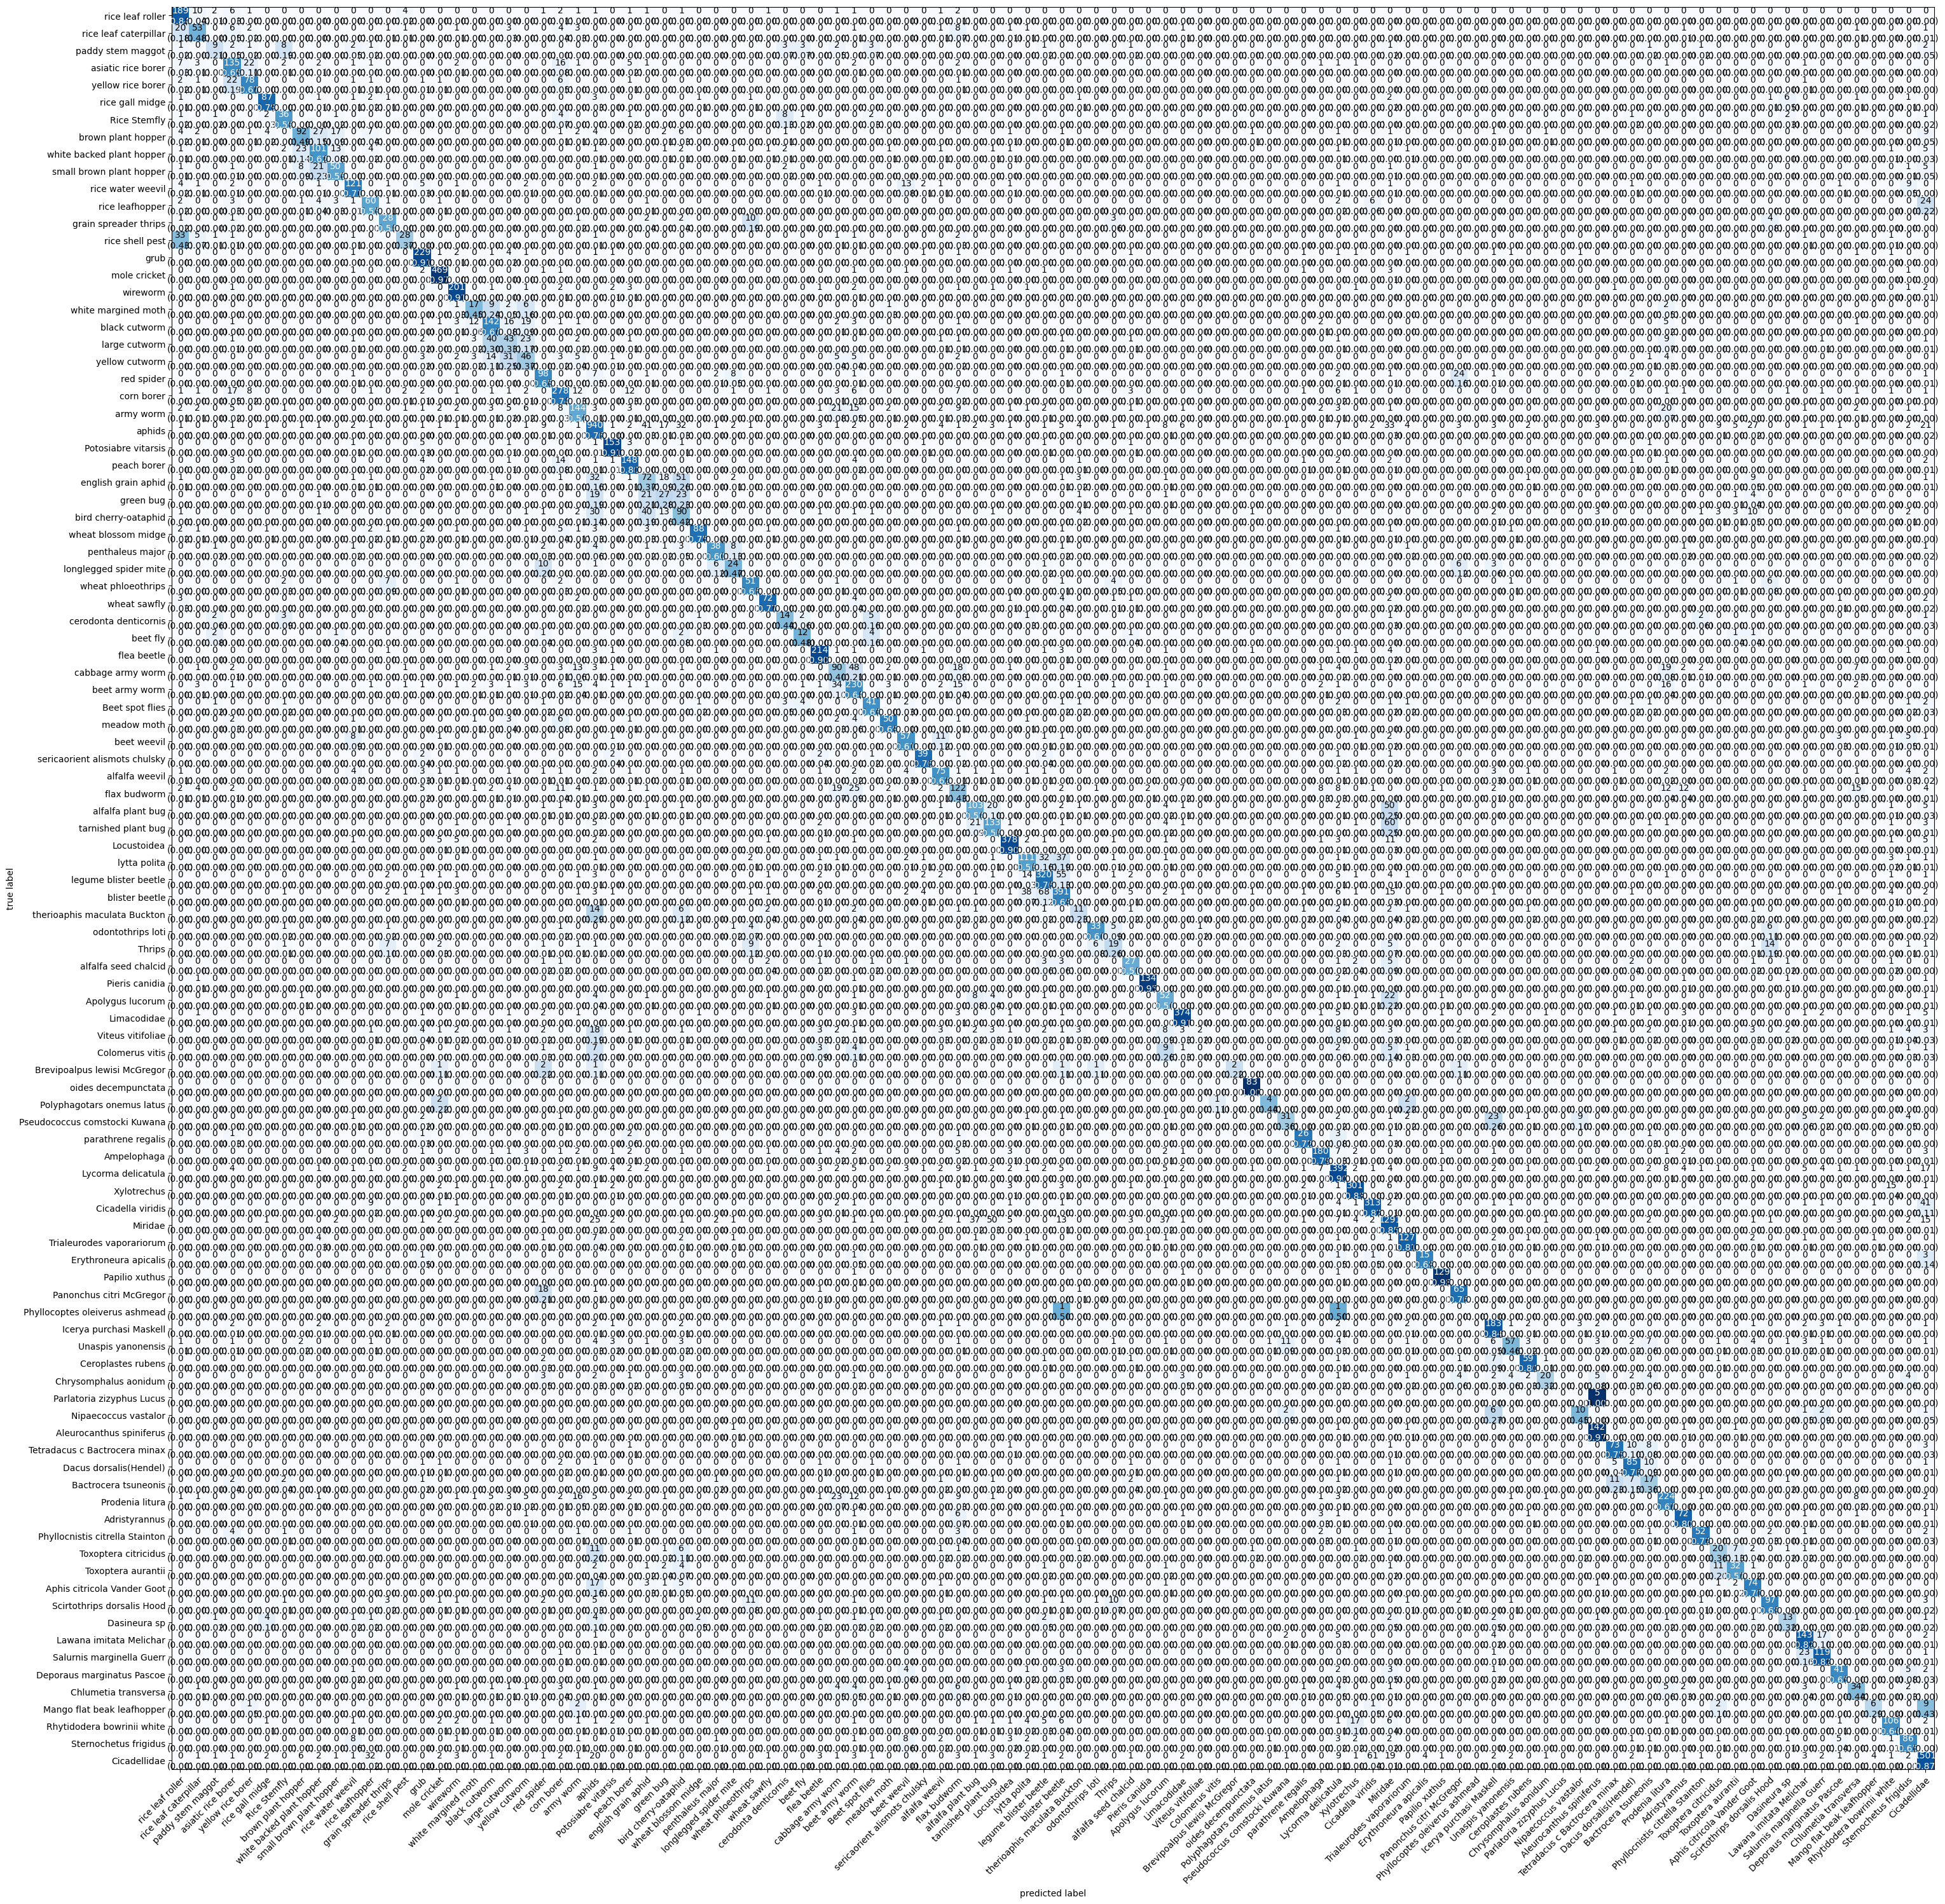

In [25]:
matRes = confusion_matrix(y_true_Res,y_pred_Res)
plot_confusion_matrix(matRes, figsize=(36,36), class_names=classes, show_normed=True)